# Cálculo del volumen del *Pocket*
## Preparativos para usar POVME
Esta libreta permite preparar los archivos y describir los pasos necesarios para ejecutar POVME y así calcular el Volumen del pocket de una proteína.

In [38]:
from prody import *
from pylab import *
import numpy as np
from pathlib import Path
import pandas as pd

### Lista de archivos PDBs que conformarán el ensamble
Cargamos la lista de archivos que conformarán el ensamble de cristales de la proteína CDK2, así como la lista de pdb IDs que les corresponden

In [5]:
# Genero una lista de archivos disponibles en el directorio de los modelos completos
import glob
main_PDBS_dir = "../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/"
dir_ENS = main_PDBS_dir +  "PREP_ALL_ENSAMBLE/" # Hidrógenos agregados sin pka

# LISTA DE ARCHIVOS: Es importante generar la lista ORDENADA!!
files_pdbs_cdk2_ENS = sorted( glob.glob(dir_ENS + "*") )
# LISTA DE PDB_IDS: Se obtiene también ordenada
pdbS_cdk2_ids = [ Path(pdb_file).stem.rsplit('_', 1)[0] for pdb_file in files_pdbs_cdk2_ENS ]

files_pdbs_cdk2_ENS[0:5]

['../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1aq1_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1b38_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1b39_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1buh_ENS.pdb',
 '../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PREP_ALL_ENSAMBLE/1ckp_ENS.pdb']

### Se cargan los PDBs

In [8]:
# Carga de los archivos pdb
# Obtengo el conjunto de estructuras pdb de CDK2
pdbs_cdk2_ENS = parsePDB( *[ pdb for pdb in files_pdbs_cdk2_ENS ])

@> 402 PDBs were parsed in 27.76s.                                                                   


### Se acarga la estructura de referencia 1fin 
#### y las subsecuecnias Pisani y ricci

In [6]:
# Podemos crear ensambles de las proteínas alineando ya sea con Pisani o con el pocket
from Funciones.subsecuencias_cdk2 import get_pisani_residues, get_ricci_residues
# Estructura de referencia
ref_id = '1fin'
ens_f_tail = "_ENS"
ref_strc = parsePDB(dir_ENS + ref_id + ens_f_tail + ".pdb")
# Selecciones para el posterior alineamiento y cálculo del centro del pocket
sel_ref_pisani = ref_strc.select("ca resnum " + get_pisani_residues("str"))
sel_ref_ricci = ref_strc.select("ca resnum " + get_ricci_residues("str"))

@> 4848 atoms and 1 coordinate set(s) were parsed in 0.22s.


### Se crea el ENSAMBLE de 402 estructuras

In [54]:
# Coordenadas de la CDK2 de refrencia tomando sólo los residuos de Pisiani
ens_cdk2 = PDBEnsemble("Ensamble CDK2 402 estructuras")
# Átomos de referencia
ens_cdk2.setAtoms( ref_strc )
# Coordenadas de referencia
ens_cdk2.setCoords( ref_strc.getCoords() )
# Ahora añadimos todas las estructuras al ensamble una a una
for structure in pdbs_cdk2_ENS:
    ens_cdk2.addCoordset(structure)

##### Número de átomos y de etiquetas

In [55]:
print(ens_cdk2.numAtoms())
print( len(ens_cdk2.getLabels() ) )
print( ens_cdk2.getLabels()[0:10])

4848
402
['1aq1_ENS', '1b38_ENS', '1b39_ENS', '1buh_ENS', '1ckp_ENS', '1di8_ENS', '1dm2_ENS', '1e1v_ENS', '1e1x_ENS', '1e9h_ENS']


## Ensamble con PISANI
Vamos a comparar dos alineamientos, el de Pisani y el de Ricci al momento de calcular el volument de las cavidades de CDK2.
### Alineamiento por CA de los residuos definidos por Pisani

@> Starting iterative superposition:
@> Step #1: RMSD difference = 4.9622e-02
@> Step #2: RMSD difference = 1.7996e-04
@> Step #3: RMSD difference = 1.1857e-06
@> Iterative superposition completed in 1.21s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.18 seconds.


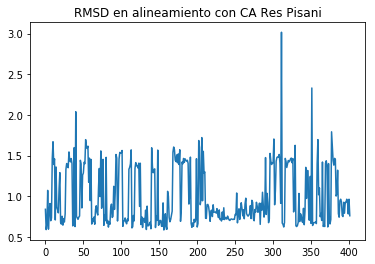

In [46]:
# Seleccionamos y alineamos con base en los CA de los residuos de Pisani
ens_cdk2.setAtoms( sel_ref_pisani )
ens_cdk2.iterpose()
# Podemos ver el rmsd entre la sestructuras
rmsd_ens_pisani = calcRMSD(ens_cdk2)
plot(rmsd_ens_pisani)
title("RMSD en alineamiento con CA Res Pisani");

### Guardamos el ensamble de  PISANI como PDB y .ens

In [42]:
# Guardamos el ensamble
# Primero volvemos a INCLUIR TODOS LOS ÁTOMOS!
ens_cdk2.setAtoms( ref_strc )
# Como archivo de ensamble
# saveEnsemble(ens_cdk2, "../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/" + "ENS_402_cdk2_PISANI_ALL")
# Como archivo PDB
# writePDB("../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/" + "PDB_402_cdk2_PISANI_ALL", ens_cdk2)

'../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/PDB_402_cdk2_PISANI_ALL.pdb'

### Ahora guardamos archivos PDB y .ens con el alineamiento por CA de residuso RICCI

@> Starting iterative superposition:
@> Step #1: RMSD difference = 1.7323e-07
@> Iterative superposition completed in 0.45s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.14 seconds.


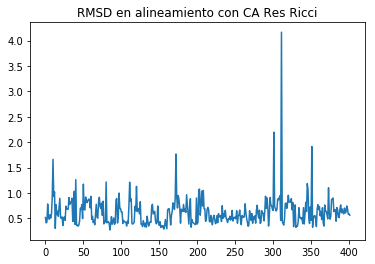

In [65]:
# Seleccionamos y alineamos con base en los CA de los residuos de Pisani
ens_cdk2.setAtoms( sel_ref_ricci )
ens_cdk2.iterpose()
# Primero volvemos a INCLUIR TODOS LOS ÁTOMOS!
# ens_cdk2.setAtoms( ref_strc )
# Como archivo de ensamble
# saveEnsemble(ens_cdk2, "../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/" + "ENS_402_cdk2_RICCIi_ALL")
# Como archivo PDB
# writePDB("../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/PRODY_ENSAMBLES/" + "PDB_402_cdk2_RICCI_ALL", ens_cdk2)

# Podemos ver el rmsd entre la sestructuras
rmsd_ens_ricci = calcRMSD(ens_cdk2)
plot(rmsd_ens_ricci)
title("RMSD en alineamiento con CA Res Ricci");

## Cálculo del centro del pocket
Para cada 

In [64]:
ens_cdk2.setAtoms( sel_ref_ricci )
ens_cdk2.iterpose()
# Calculo de la posicion del centro
calcCenter(ens_cdk2)

@> Starting iterative superposition:
@> Step #1: RMSD difference = 5.5038e-02
@> Step #2: RMSD difference = 9.5484e-05
@> Iterative superposition completed in 0.76s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.18 seconds.


array([-12.52025375, 206.41124316, 113.77416799])

In [63]:
ens_cdk2.setAtoms( sel_ref_pisani )
ens_cdk2.iterpose()
# Calculo de la posicion del centro
ens_cdk2.setAtoms( sel_ref_ricci )
calcCenter(ens_cdk2)

@> Starting iterative superposition:
@> Step #1: RMSD difference = 7.3952e-09
@> Iterative superposition completed in 0.43s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.14 seconds.


array([-12.52025375, 206.41124316, 113.77416799])